
Linear Regression (Ridge) Cross-Validation Metrics:
Mean RMSE (5-fold CV): 0.4780
Mean R² (5-fold CV): -0.2289

Decision Tree (Tuned) Cross-Validation Metrics:
Mean RMSE (5-fold CV): 0.4868
Mean R² (5-fold CV): -0.2375

Random Forest Cross-Validation Metrics:
Mean RMSE (5-fold CV): 0.4806
Mean R² (5-fold CV): -0.2312

Comparison of Model Evaluation Metrics:
          Linear Regression (Ridge)  Decision Tree (Tuned)  Random Forest
R² Score                  -0.096979              -0.112469      -0.160769
MAE                        0.421493               0.392369       0.393951
MSE                        0.228725               0.231955       0.242026
RMSE                       0.478253               0.481617       0.491961
Accuracy                  -0.422538              -0.324245      -0.329583


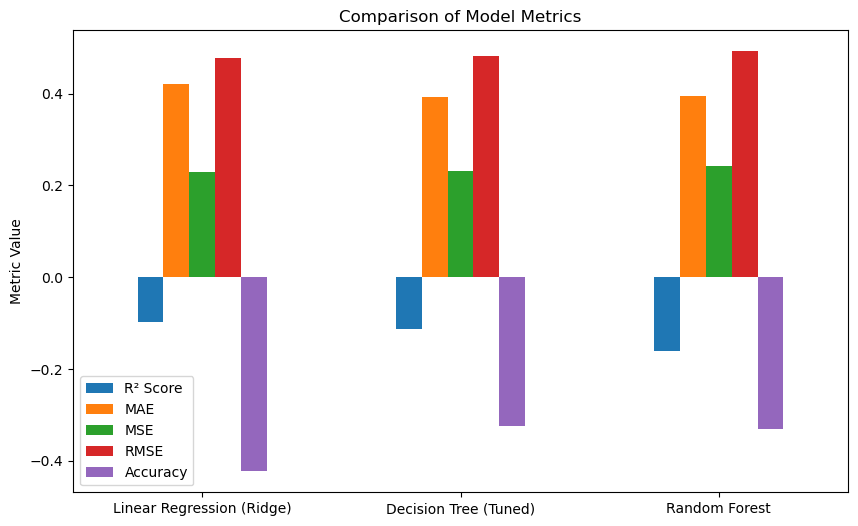

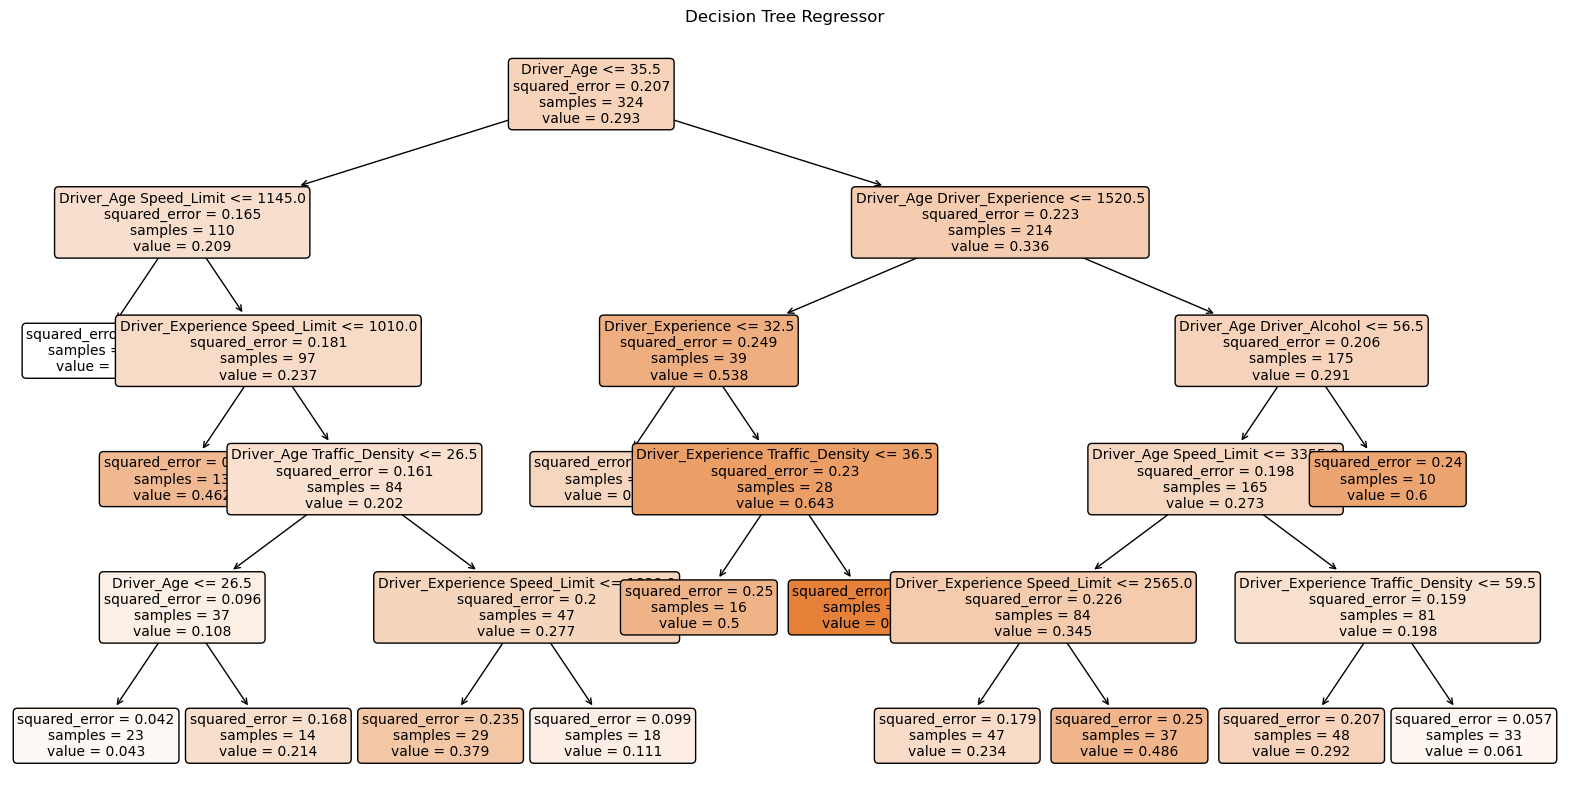

In [63]:
# Required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
import numpy as np  # for RMSE

# Load the data
file_path = r'C:\Users\kanis\Documents\Univ\advanced-coding\group project\cleaned_data.csv'
data = pd.read_csv(file_path)

# Encode categorical columns to numeric
categorical_columns = ['Weather', 'Road_Type', 'Time_of_Day', 'Accident_Severity', 
                       'Road_Condition', 'Vehicle_Type', 'Road_Light_Condition']
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

# Select numeric columns for modeling
numeric_columns = ['Traffic_Density', 'Speed_Limit', 'Number_of_Vehicles', 
                   'Driver_Alcohol', 'Driver_Age', 'Driver_Experience', 'Accident']

# Define the feature (X) and target (y)
# Use more features for the model
X = data[['Driver_Age', 'Driver_Experience', 'Traffic_Density', 'Speed_Limit', 'Driver_Alcohol']]
y = data['Accident']

# 1️⃣ **Polynomial Features (Feature Engineering)**
poly = PolynomialFeatures(degree=2, include_bias=False)  # Polynomial features of degree 2
X_poly = poly.fit_transform(X)

# 2️⃣ **Linear Regression (with Ridge regularization)**
linear_model = Ridge(alpha=1.0)  # Ridge regression (L2 regularization)

# Cross-validation for Linear Regression (Ridge)
linear_cv_scores = cross_val_score(linear_model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
linear_cv_rmse = np.sqrt(-linear_cv_scores)  # convert MSE to RMSE
linear_cv_mean_rmse = linear_cv_rmse.mean()
linear_cv_mean_r2 = linear_cv_scores.mean()

print("\nLinear Regression (Ridge) Cross-Validation Metrics:")
print(f"Mean RMSE (5-fold CV): {linear_cv_mean_rmse:.4f}")
print(f"Mean R² (5-fold CV): {linear_cv_mean_r2:.4f}")

# 3️⃣ **Decision Tree Regressor (with Hyperparameter Tuning)**
tree_model = DecisionTreeRegressor(random_state=42)

# Hyperparameter tuning for Decision Tree
param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search_tree = GridSearchCV(tree_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

best_tree_model = grid_search_tree.best_estimator_

# Cross-validation for Decision Tree with Grid Search
tree_cv_scores = cross_val_score(best_tree_model, X, y, cv=5, scoring='neg_mean_squared_error')
tree_cv_rmse = np.sqrt(-tree_cv_scores)  # convert MSE to RMSE
tree_cv_mean_rmse = tree_cv_rmse.mean()
tree_cv_mean_r2 = tree_cv_scores.mean()

print("\nDecision Tree (Tuned) Cross-Validation Metrics:")
print(f"Mean RMSE (5-fold CV): {tree_cv_mean_rmse:.4f}")
print(f"Mean R² (5-fold CV): {tree_cv_mean_r2:.4f}")

# 4️⃣ **Random Forest Regressor (Another Model to Increase R²)**
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
rf_cv_rmse = np.sqrt(-rf_cv_scores)  # convert MSE to RMSE
rf_cv_mean_rmse = rf_cv_rmse.mean()
rf_cv_mean_r2 = rf_cv_scores.mean()

print("\nRandom Forest Cross-Validation Metrics:")
print(f"Mean RMSE (5-fold CV): {rf_cv_mean_rmse:.4f}")
print(f"Mean R² (5-fold CV): {rf_cv_mean_r2:.4f}")

# 5️⃣ **Train-Test Split for Final Evaluation**
# Train-test split for final model evaluation
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the final models and predict on the test set

# Linear Regression (Ridge)
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Evaluation metrics for Linear Regression (Ridge)
linear_r2 = r2_score(y_test, y_pred)
linear_mae = mean_absolute_error(y_test, y_pred)
linear_mse = mean_squared_error(y_test, y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_accuracy = 1 - (linear_mae / y_test.mean())  # Custom accuracy

# Decision Tree (Tuned)
best_tree_model.fit(X_train, y_train)
y_tree_pred = best_tree_model.predict(X_test)

# Evaluation metrics for Decision Tree
tree_r2 = r2_score(y_test, y_tree_pred)
tree_mae = mean_absolute_error(y_test, y_tree_pred)
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_accuracy = 1 - (tree_mae / y_test.mean())  # Custom accuracy

# Random Forest
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Evaluation metrics for Random Forest
rf_r2 = r2_score(y_test, y_rf_pred)
rf_mae = mean_absolute_error(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_accuracy = 1 - (rf_mae / y_test.mean())  # Custom accuracy

# 6️⃣ **Comparison of Model Metrics**
# Store the metrics in a dictionary for display
model_metrics = {
    'Linear Regression (Ridge)': [linear_r2, linear_mae, linear_mse, linear_rmse, linear_accuracy],
    'Decision Tree (Tuned)': [tree_r2, tree_mae, tree_mse, tree_rmse, tree_accuracy],
    'Random Forest': [rf_r2, rf_mae, rf_mse, rf_rmse, rf_accuracy]
}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics, index=['R² Score', 'MAE', 'MSE', 'RMSE', 'Accuracy'])

# Print the metrics DataFrame
print("\nComparison of Model Evaluation Metrics:")
print(metrics_df)

# 7️⃣ **Visualize the Metrics**
metrics_df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Metrics')
plt.ylabel('Metric Value')
plt.xticks(rotation=0)
plt.show()

# 8️⃣ **Display the Decision Tree Structure**
# Plot decision tree structure (if Decision Tree model is selected)
if best_tree_model:
    # Polynomial features generate new features like x1^2, x1*x2, etc.
    # So we need to generate feature names for these new features.
    poly_feature_names = poly.get_feature_names_out(X.columns.tolist())
    
    plt.figure(figsize=(20, 10))
    plot_tree(best_tree_model, feature_names=poly_feature_names, filled=True, rounded=True, fontsize=10)
    plt.title("Decision Tree Regressor")
    plt.show()

